**Stroke Prediction**

1.   **Introduction**
*   1.1. Importing Libraries
*   1.2. Importing Dataset
*   1.3. Missing Values
2. **Data Visualization**
* 2.1. Corr Heat Map
* 2.2. Count Plot
* 2.3. Distibution Plot
* 2.4. Violin Plot

3. **Data Preprocessing**
* 3.1. Label Encoder
* 3.2. X and Y Splitting
* 3.3. Column Transformator and OneHotEncoder
* 3.4. Train Test Split
* 3.5. Smote
4. **Model Selection**
5. **Model Tuning**

1. **Introduction**
* 1.1 Importing Libraries





In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

1.2 Importing Dataset

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


1.3 Missing Values

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We fill the missing values in the Body Mass Index variable with the average value.

In [5]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [6]:
df.describe()

id          age  ...          bmi       stroke
count   5110.000000  5110.000000  ...  5110.000000  5110.000000
mean   36517.829354    43.226614  ...    28.893237     0.048728
std    21161.721625    22.612647  ...     7.698018     0.215320
min       67.000000     0.080000  ...    10.300000     0.000000
25%    17741.250000    25.000000  ...    23.800000     0.000000
50%    36932.000000    45.000000  ...    28.400000     0.000000
75%    54682.000000    61.000000  ...    32.800000     0.000000
max    72940.000000    82.000000  ...    97.600000     1.000000

[8 rows x 7 columns]

**2.Data Visualization**

2.1 Corr Heat Map


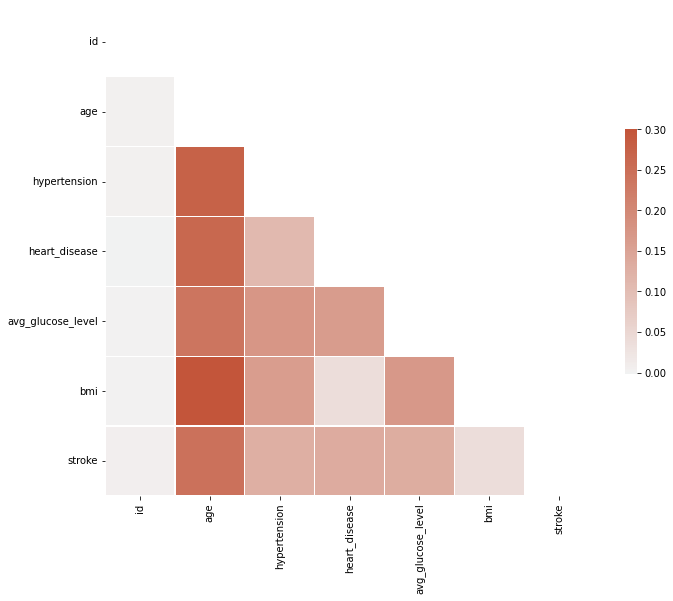

In [7]:
# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

2.2 Count Plot

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


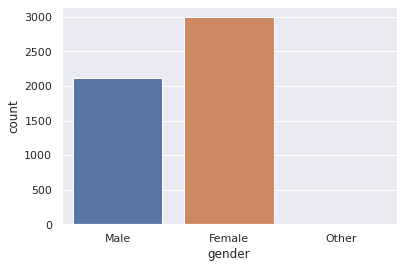

In [8]:
print(df.gender.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='gender')

Yes    3353
No     1757
Name: ever_married, dtype: int64


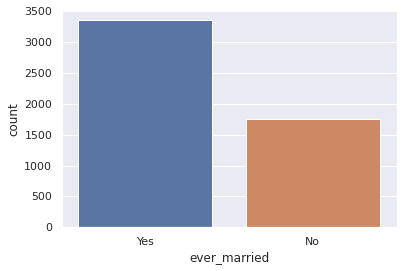

In [9]:
print(df.ever_married.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='ever_married')

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


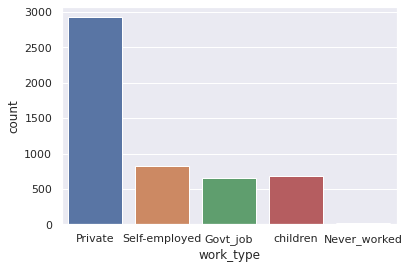

In [10]:
print(df.work_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='work_type')

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


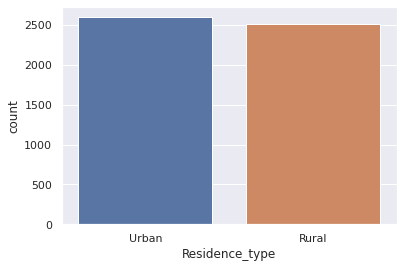

In [11]:
print(df.Residence_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='Residence_type')

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


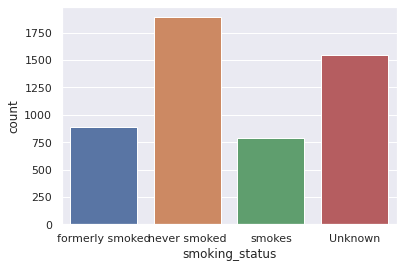

In [12]:
print(df.smoking_status.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='smoking_status')

0    4861
1     249
Name: stroke, dtype: int64


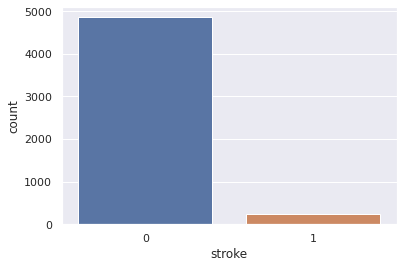

In [13]:
print(df.stroke.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='stroke')

2.3 Distribution Plot

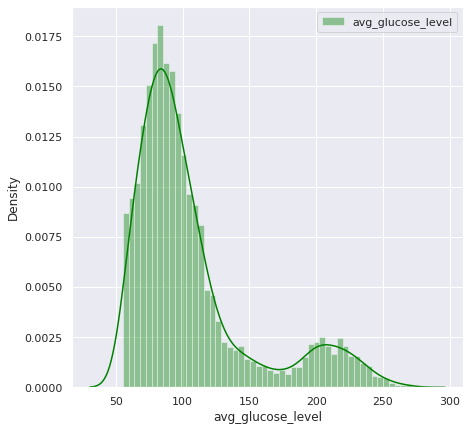

In [14]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)
plt.legend()

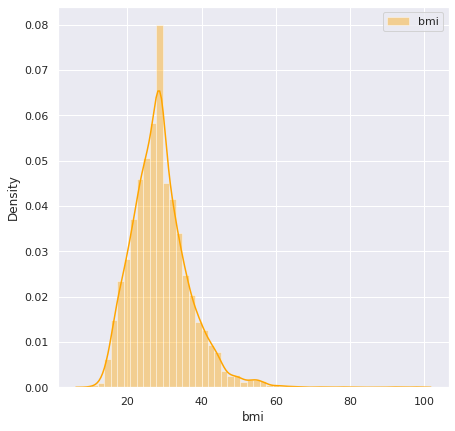

In [15]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi,color='orange',label='bmi',kde=True)
plt.legend()

(10.0, 100.0)

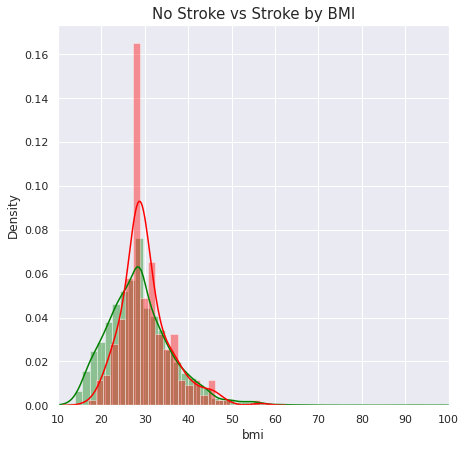

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

2.4 Violin Plot

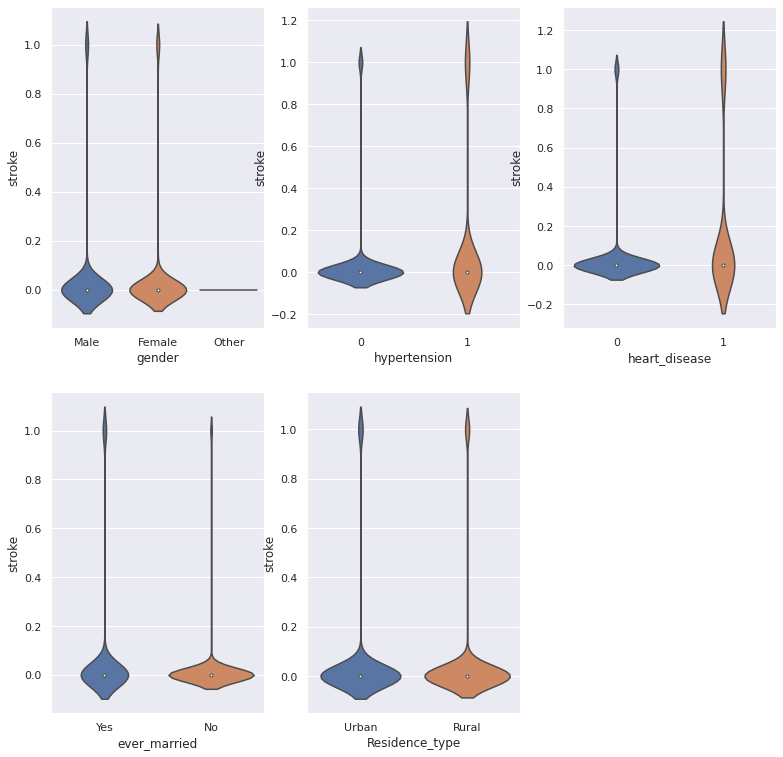

In [19]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=df)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=df)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=df)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,5)
sns.violinplot(x='Residence_type',y='stroke',data=df)
plt.show()

**3.Data Preprocessing**

In [20]:
df.head()

id  gender   age  ...        bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.600000  formerly smoked      1
1  51676  Female  61.0  ...  28.893237     never smoked      1
2  31112    Male  80.0  ...  32.500000     never smoked      1
3  60182  Female  49.0  ...  34.400000           smokes      1
4   1665  Female  79.0  ...  24.000000     never smoked      1

[5 rows x 12 columns]

3.1 Label Encoder

In [21]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [22]:
df.head(3)

id  gender   age  ...        bmi  smoking_status  stroke
0   9046       1  67.0  ...  36.600000               1       1
1  51676       0  61.0  ...  28.893237               2       1
2  31112       1  80.0  ...  32.500000               2       1

[3 rows x 12 columns]

3.2 X and Y Splitting

In [23]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


3.3 Column Transformator and OneHotEncoder

In [24]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

3.4 Train Test Split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 19)
Number transations x_test df (1022, 19)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


3.5 Smote

In [27]:
from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [28]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7786, 19)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


**4. Model Selection**

In [29]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [30]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[964   4]
 [ 51   3]]
Accuracy Score:  0.9461839530332681

K-Fold Validation Mean Accuracy: 96.76 %

Standard Deviation: 7.23 %

ROC AUC Score: 0.53 %

Precision: 0.43 %

Recall: 0.06 %

F1 Score: 0.10 %
----------------------------------------

Logistic Regression :
[[755 213]
 [ 15  39]]
Accuracy Score:  0.776908023483366

K-Fold Validation Mean Accuracy: 78.64 %

Standard Deviation: 1.65 %

ROC AUC Score: 0.75 %

Precision: 0.15 %

Recall: 0.72 %

F1 Score: 0.25 %
----------------------------------------

SVM :
[[696 272]
 [ 13  41]]
Accuracy Score:  0.7211350293542075

K-Fold Validation Mean Accuracy: 78.50 %

Standard Deviation: 1.88 %

ROC AUC Score: 0.74 %

Precision: 0.13 %

Recall: 0.76 %

F1 Score: 0.22 %
----------------------------------------

KNeigbors :
[[808 160]
 [ 26  28]]
Accuracy Score:  0.8180039138943248

K-Fold Validation Mean Accuracy: 89.12 %

Standard Deviation: 0.99 %

ROC AUC Score: 0.68 %

Precision: 0.15 %

Recall: 0.52 %

F1 Score: 0.23 %

**BLENDED ENSEMBLE**

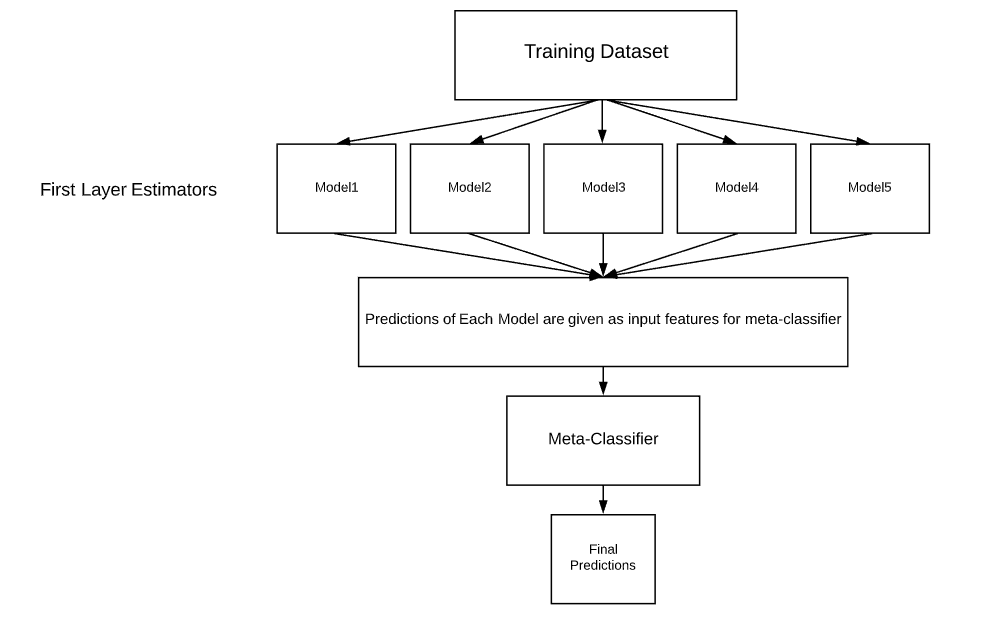

In [60]:
!pip install six

In [62]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlxtend

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [86]:

from sklearn.pipeline import make_pipeline
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = ExtraTreesClassifier()
clf3 = GaussianNB()
clf4 = BaggingClassifier()
clf5 = DecisionTreeClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4,clf5], 
                          meta_classifier=lr)

In [87]:
from sklearn import model_selection
for clf, label in zip([clf1, clf2, clf3, clf4,clf5,sclf], 
                      ['KNN', 
                       'extra trees', 
                       'Naive Bayes',
                       'bagging',
                       'decision tree',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x, y, 
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.92 (+/- 0.00) [KNN]
Accuracy: 0.94 (+/- 0.00) [svm]
Accuracy: 0.44 (+/- 0.05) [Naive Bayes]
Accuracy: 0.95 (+/- 0.00) [xgboost]
Accuracy: 0.91 (+/- 0.01) [decision tree]
Accuracy: 0.95 (+/- 0.00) [StackingClassifier]


**5. Model Tuning**

In [88]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [89]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 XGBClassifier(): 
 Best Accuracy: 96.76 %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 90.71 %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 95.20 %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 97.23 %

-------------------------



              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.43      0.06      0.10        54

    accuracy                           0.95      1022
   macro avg       0.69      0.53      0.54      1022
weighted avg       0.92      0.95      0.93      1022

ROC AUC score: 0.7911023109886747
Accuracy Score:  0.9461839530332681


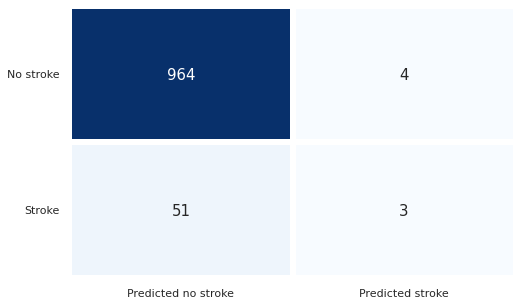

Text(0.5, 0, 'False Positive Rate')

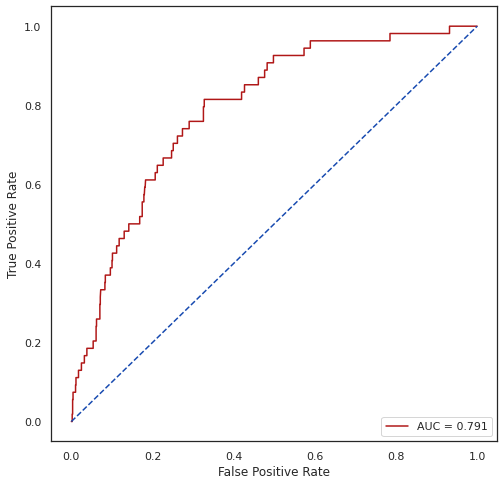

In [90]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')